In [9]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from dotenv import load_dotenv
import os
from typing import TypedDict
from langgraph.graph import StateGraph, END

load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

In [10]:
llm = ChatOpenAI(temperature=0, model='gpt-4o-mini')

In [11]:
def analyze_question(state):
    prompt = PromptTemplate.from_template(
        """
    You are a classification agent. Your task is to determine if the given question is related to technical code development or is a general inquiry.
    
    Question: {question}
    
    Analyze the question carefully. Respond only with "code" if the question involves technical code development (e.g., programming languages, algorithms, software development). Respond with "general" if the question is not related to code.
    
    Your answer (code/general):
    """
    )
    
    chain = prompt | llm
    
    response = chain.invoke({'question': state['question']})
    
    decision = response.content.strip().lower()
    
    return {'decision': decision, 'question': state['question']}

In [12]:
def router(state):
    if state['decision'] == 'code':
        return "code_agent"
    else:
        return "generic_question"

In [13]:
# Code agent to anwere only technicla code development related questions


def code_agent(state):
    prompt = PromptTemplate.from_template(
        """
    You are a software engineer. Provide a detailed, step-by-step explanation in response to the following question:
    
    Question: {question}
    
    Ensure your answer is clear and thorough, covering each step logically and precisely.
    """
    )
    
    chain = prompt | llm
    
    response = chain.invoke({'question': state['question']})
    
    return {'output': response}

In [14]:
def generic_question(state):
    prompt = PromptTemplate.from_template(
        """
    You are a knowledgeable assistant. Provide a clear and concise answer to the following question:

    Question: {question}

    Ensure your response is accurate, informative, and easy to understand.
    """
    )
    
    chain = prompt | llm
    
    response = chain.invoke({'question': state['question']})
    
    return {'output': response}

In [19]:
class AgentState(TypedDict):
    question: str
    decision: str
    output: str
    
    
workflow = StateGraph(AgentState)

workflow.add_node('analyze_question', analyze_question)
workflow.add_node('code_agent', code_agent)
workflow.add_node('generic_question', generic_question)

workflow.set_entry_point('analyze_question')
workflow.add_conditional_edges('analyze_question', router, {
    'code_agent': 'code_agent',
    'generic_question': 'generic_question',
})

workflow.add_edge("code_agent", END)
workflow.add_edge("generic_question", END)

graph = workflow.compile()

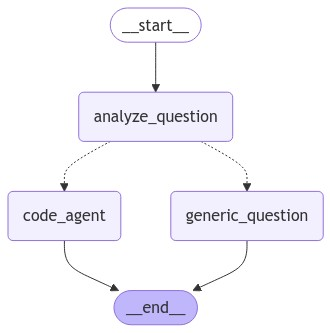

In [20]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [26]:
user_question = "How to create a REST API using Python and Flask?"

response = graph.invoke({'question': user_question})

print(response['output'].content)


Creating a REST API using Python and Flask involves several steps, from setting up your environment to writing the code for the API itself. Below is a detailed, step-by-step guide to help you through the entire process.

### Step 1: Set Up Your Environment

1. **Install Python**:
   Ensure you have Python installed on your machine. You can download it from the official Python website: [python.org](https://www.python.org/downloads/).

   To check if Python is installed, open your terminal or command prompt and run:
   ```bash
   python --version
   ```

2. **Install Flask**:
   Flask is a micro web framework for Python. You can install Flask using pip (the package manager for Python). Open your terminal and run:
   ```bash
   pip install Flask
   ```

3. **Create a Project Directory**:
   Create a new folder for your project. This helps keep your files organized.
   ```bash
   mkdir flask_api
   cd flask_api
   ```

### Step 2: Create a Basic Flask Application

1. **Create the Main Appl

In [27]:
user_question = "What is the capital city of Kenya?"

response = graph.invoke({'question': user_question})

print(response['output'].content)

The capital city of Kenya is Nairobi. It is the largest city in the country and serves as a major economic, political, and cultural hub in East Africa.
